# 9.1 Optimising Mandelbrot

*Estimated time for this notebook: 5 minutes*

Let's start by reproducing our `mandel1` function and its output, `data1`, from the previous notebook.

In [1]:
xmin = -1.5
ymin = -1.0
xmax = 0.5
ymax = 1.0
resolution = 300
xstep = (xmax - xmin) / resolution
ystep = (ymax - ymin) / resolution
xs = [(xmin + xstep * i) for i in range(resolution)]
ys = [(ymin + ystep * i) for i in range(resolution)]

In [2]:
def mandel(start, max_iterations=50):
    """Todo Explain the return value."""

    # ToDo Pam, should we start at c or 0?
    value = 0

    counter = 0
    while counter < max_iterations:
        if abs(value) > 2:
            break

        value = (value ** 2) + start

        counter = counter + 1

    return counter

In [ ]:
def listcomp_mandel(xs, ys):
    return [[mandel(complex(x, y)) for x in xs] for y in ys]

In [ ]:
def for_loop_mandel(xs, ys):
    result = []
    
    for y in ys...
    
    return result

In [3]:
data1 = [[mandel(complex(x, y)) for x in xs] for y in ys]

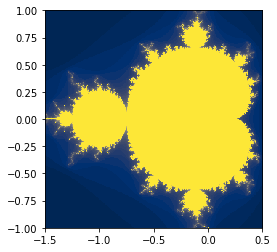

In [5]:
from matplotlib import pyplot as plt

plt.set_cmap("cividis")  # use a CVD-friendly palette
plt.imshow(
    data1,
    interpolation="none",
    extent=[xmin, xmax, ymin, ymax],
    origin="lower"
)

## Many Mandelbrots

Let's compare our naive python implementation which used a list comprehension, taking around 500ms, with the following:

In [5]:
def mandel_append():
    data = []
    for y in ys:
        row = []
        for x in xs:
            row.append(mandel1(complex(x, y)))
        data.append(row)
    return data

In [6]:
%%timeit
data2 = mandel_append()

406 ms ± 9.94 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Interestingly, not much difference. I would have expected this to be slower, due to the normally high cost of **appending** to data.

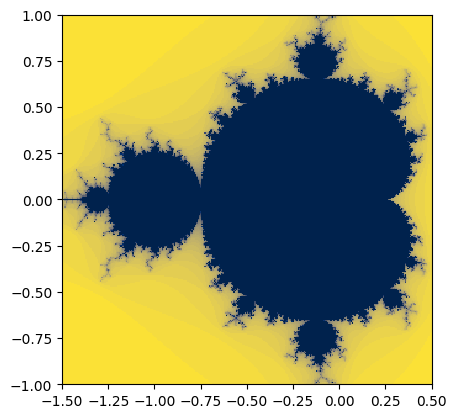

In [7]:
data2 = mandel_append()
plt.imshow(data2, interpolation="none", extent=[xmin, xmax, ymin, ymax])

We ought to be checking if these results are the same by comparing the values in a test, rather than re-plotting. This is cumbersome in pure Python, but easy with NumPy, so we'll do this later.

Let's try a pre-allocated data structure:

In [8]:
data3 = [[0 for i in range(resolution)] for j in range(resolution)]

In [9]:
def mandel_preallocated(data_structure):
    for j, y in enumerate(ys):
        for i, x in enumerate(xs):
            data_structure[j][i] = mandel1(complex(x, y))

In [10]:
%%timeit
mandel_preallocated(data3)

389 ms ± 9.69 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


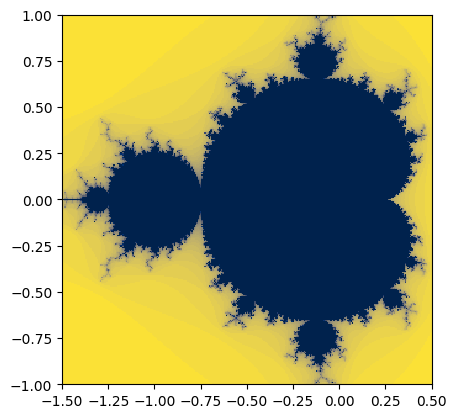

In [11]:
mandel_preallocated(data3)
plt.imshow(data3, interpolation="none", extent=[xmin, xmax, ymin, ymax])

Nope, no gain there. 

Let's try using functional programming approaches:

In [12]:
def mandel_functional(ys):
    data = []
    for y in ys:
        bind_mandel = lambda x: mandel1(complex(x, y))
        data.append(list(map(bind_mandel, xs)))
    return data

In [13]:
%%timeit
data4 = mandel_functional(ys)

449 ms ± 11.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


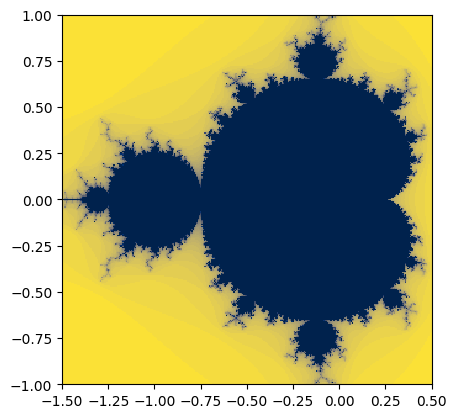

In [14]:
data4 = mandel_functional(ys)
plt.imshow(data4, interpolation="none", extent=[xmin, xmax, ymin, ymax])

That was a tiny bit slower.

So, what do we learn from this? Our mental image of what code should be faster or slower is often wrong, or doesn't make much difference. The only way to really improve code performance is empirically, through measurements.